In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mymoviedb.csv",lineterminator = '\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Data Preprocessing

In [7]:
df.info()
# change the release date from obejct to date-time format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
# to check duplicate values
df.duplicated().sum()

0

In [9]:
# show basic statistic of data
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [10]:
# exploration summary

# 1.we have a dataframe consisting of 9827 rows and 9 coloumns.
# 2.our dataset looks a bit tidy with no NaNs nor duplicated values.
# 3.release_date coloumn needs to be casted into date time and to extract only the year value.
# 4.overview, original_language and poster-url would not be so useful during analysis, so we'll drop them.
# 5.there is noticable outliers in popularity coloumn.
# 6.vote_average better be categorized for proper analysis.
# 7.genre column has comma seperated values and white spaces that needs to be handled and casted into category.
                                    

### converting release_date from object to data-time format.

In [13]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [20]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [23]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [25]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

### dropping the columns

In [28]:
cols = ['Overview','Original_Language','Poster_Url']

In [30]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing vote_average column
we would cut the vote_average value and make 4 categories: popular,average,below_average,not_popular to describe it more using catigorize_col() function provided above.

In [35]:
# user defined function for categorization of vote_average column.
def categorize_col(df,col,labels):
    stats = df[col].describe()
    edges = [stats['min'],
             stats['25%'],
             stats['50%'],
             stats['75%'],
             stats['max']]
    df[col] = pd.cut(df[col],edges,labels = labels,duplicates='drop')  # cut func helps in categorization
    return df

In [37]:
labels = ['not_popular','below_average','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [41]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [43]:
# deleting the NaN values
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [45]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### remove whitespaces between the genres 
we would split genre into a list and then explode our dataframe to have only one genre per row for each movie

In [48]:
df['Genre']=df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)  # explode will split the genre and reset_index will be set as 0,1,2... to each genre for each movie
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [50]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [52]:
df.info()
# previous data --> 9827
# now data after spliting --> 25552

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [54]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [57]:
sns.set_style('whitegrid')

### what is the most frequesnt genre of movie released on netflix?

In [60]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

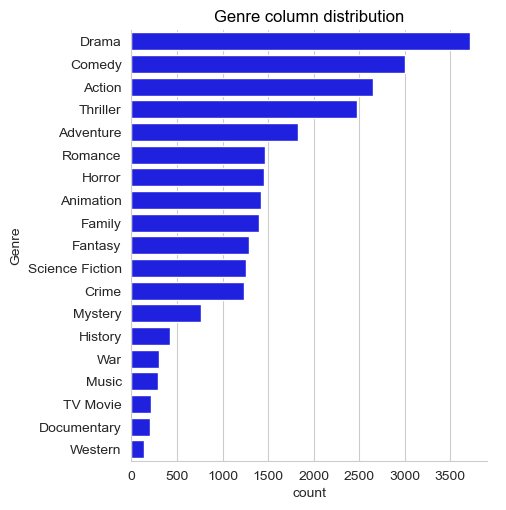

In [62]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='blue')
plt.title('Genre column distribution',color='black')
plt.show()

### which was highest vote in vote_average column?

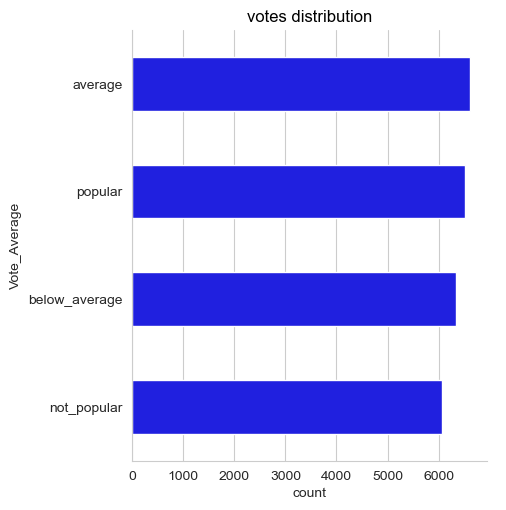

In [64]:
sns.catplot(y="Vote_Average",data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color = 'blue',
            width = 0.5)
plt.title('votes distribution',color='black')
plt.show()

### What movie got the highest popularity? what is it's genre?

In [67]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [70]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### which movie got the lowest popularity? what is it's genre?

In [73]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### which year has the most flimmed movies?

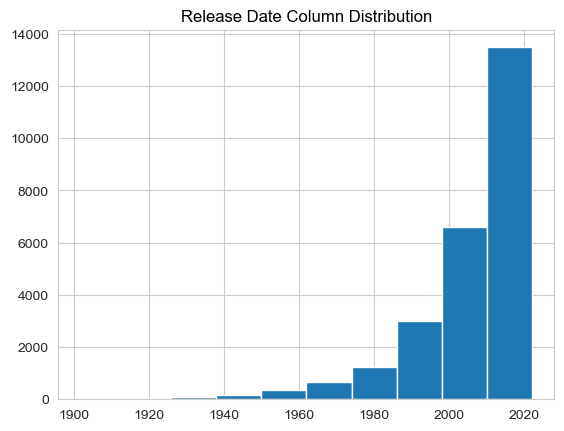

In [78]:
df['Release_Date'].hist()
plt.title("Release Date Column Distribution",color = 'black')
plt.show()

### Conclusion
Q1: what is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the time among 19 other genres.

Q2: what genre has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being havingmore than 18.5% movies.

Q3: which movie got the highest popularity? what is its genre?

spider-man: no way home has highest popularity rate in our dataset and it has genres of action,adventure and science fiction.

Q4: which movie got the lowest popularity? what is it's genre?

the united states, thread has the lowest popularity in our dataset and it has genres of music , drama, war, sci-fi and history.

Q5: which year has the most flimmed movies?

year 2020 has the highest flimmimg rate in our dataset.